<a href="https://colab.research.google.com/github/SantoshSingh1707/Machine-Learning/blob/main/01_neural_network_regression_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Network in Tensorflow

There are many defination for regression problem but in our case ,we're going to simplify it :predicting a numerical variable based on some other combination of variable ,even shorter ...predicting a number

In [ ]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.17.0


## Creating data to view and fit

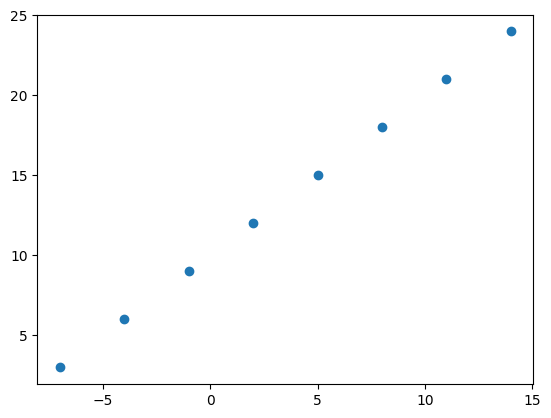

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create Features
X = np.array([-7.0,-4.0,-1.0,2.0, 5.0,8.0,11.0,14.0 ])

# Create labels
y = np.array([3.0 , 6.0 , 9.0 , 12.0 , 15.0 , 18.0 , 21.0,24.0])

# Visualize it
plt.scatter( X , y )

In [ ]:
y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info ,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0] , y[0]

(-7.0, 3.0)

In [ ]:
X[1] ,y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape , output_shape

((), ())

In [ ]:
# Turn our NumPy arrays to tensors
X=tf.cast(tf.constant(X),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape , output_shape

(TensorShape([]), TensorShape([]))

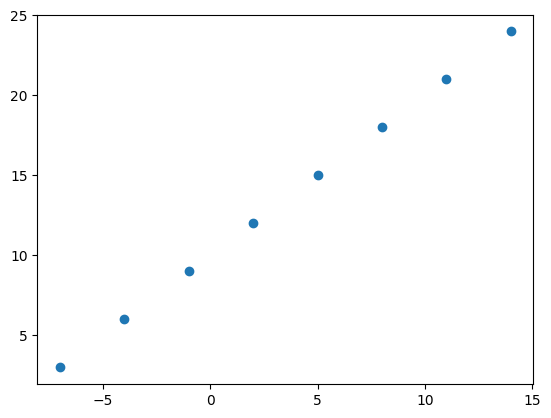

In [ ]:
plt.scatter(X , y)

## Steps in modelling with TensorFlow

1.**Creating a model** - define the input and output layers , as well as the hidden layers of a deep learnig model.
2. **Compiling a model** - define the loss function (in other words ,the function which tells our model how wrong it is ) and the optimizer (tells our model how to improve the patters its learning of model).
3. **Fitting a model** - letting the model try to find patterns between X & y (feature and labels).

In [ ]:
X = tf.reshape(X, shape=(-1, 1))
y = tf.reshape(y, shape=(-1, 1))
# Set random seed
tf.random.set_seed(42)
# 1. Create a model using a sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. compile the model
model.compile(loss=tf.keras.losses.mae,# mae is short for Mean absolute error
              optimizer=tf.keras.optimizers.SGD(),#sgd is short for stochastic gradient descent
              metrics=["mae"])
# 3. Fit the model
model.fit(X , y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 8.5839 - mae: 8.5839
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 8.4514 - mae: 8.4514
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - loss: 8.3189 - mae: 8.3189
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 8.1864 - mae: 8.1864
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 8.0539 - mae: 8.0539


In [ ]:
X ,y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]], dtype=float32)>)

In [ ]:
# Try to make a prediction using our model
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


array([[26.903214]], dtype=float32)

## Imporving our model
We can improve our model , by altering the steps we took to model.

1.**Creating a model** - we might add more layers increase the number of hidden units (all called neuronss) within each of the hidden layers .change the activision function of each layer .

2.**Compiling the model** - we might change the optimization function or perhaps the **lerning rate** of the optimization function.

3.**Fitting a model** - we might fit for more **epochs**(leave it traning for longer) or more data (give thee model more examples to learn form).

In [ ]:
# Let's rebuild our model
# 1. Create the model

model =tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. Fit the model (this time we'll train our model longer)
model.fit(X,y,epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 21.4240 - mae: 21.4240
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 21.0309 - mae: 21.0309
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 20.6377 - mae: 20.6377
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 20.3005 - mae: 20.3005
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 20.0193 - mae: 20.0193
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 19.7380 - mae: 19.7380
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 19.4568 - mae: 19.4568
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 19.1755 - mae: 19.1755
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 18.8943 - mae: 18.8943
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 18.6130 - mae: 18.6130
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 18.3318 - mae: 18.3318
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 18.0505 - mae: 18.0505
Epoch 13/100
1/1 ━━━━━━━━━

In [ ]:
# Remind ourselves of the data
X,y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]], dtype=float32)>)

In [ ]:
pre=tf.constant([17.0])
model.predict(pre)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[29.359268]], dtype=float32)

### Commom Ways to impore a deep model :
. Adding layers

. Increase the number of hidden units

. Change the activation functions

. Change the optimization function

. Change the learning rate

. Fitting on more data

. Fitting for longer

In [ ]:
# Adding more layers and changing Omptimizers
# 1. Create the model

model =tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=["mae"])

# 3. Fit the model (this time we'll train our model longer)
model.fit(X,y,epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.2764 - mae: 13.2764
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 12.6144 - mae: 12.6144
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11.9603 - mae: 11.9603
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.3099 - mae: 11.3099
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 10.6587 - mae: 10.6587
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 10.0021 - mae: 10.0021
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 9.3352 - mae: 9.3352
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 8.6536 - mae: 8.6536
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 7.9530 - mae: 7.9530
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 7.2293 - mae: 7.2293
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 6.7166 - mae: 6.7166
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.8156 - mae: 6.8156
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
X,y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]], dtype=float32)>)

In [ ]:
# Making the prediction
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[27.669453]], dtype=float32)

## Evaluting a model

In practice, a typical workflow you'll go through when building neural networks is :     
```
Build a model -> fit it -> evalute it -> tweak a model -> fit it -> evaluate it -> tweak a mdoel -> fit it ->evaluate it ...
```

When it  comes to evaluation ... there are 3 words you should memotize:
> "Visualize,Visualize,Visualize"

It's a good idea to visualize :
 * The data - What data are we working with? What does it looks like ?
 * The model itself - what does our model looks like?
 * The traning of a model - how doesa model perform while it learns?
 * The presdiction of the model - how do the prediction of the model line up against the ground truth (the original lables) ?

In [ ]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make lables for the dataset
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

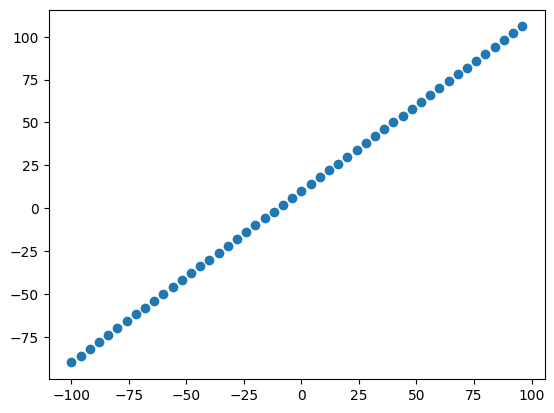

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The 3 sets...

* **Traning set** - the model lerns from this data 70-80 % of the total data available.
* **Validation se**t - the model gets tuned ont his data , which is typically 10-15% of the data availbale .

* **Test set** - the model gets evaluated on this data to test what it has learned ,this set is typically 10-15% of the total data available .

In [ ]:
# Check the length of the sample we are working on
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train=X[:40] # First 40 are traning samples (80% of the data)
y_train=y[:40]

X_test=X[40:] # Last 10 are test samples (20% of the data)
y_test=y[40:]

len(X_train),len(X_test)
len(y_train),len(y_test)

(40, 10)

### Visualizing the data

Now we've got our data in tranig and test sets , let's visualize it again!

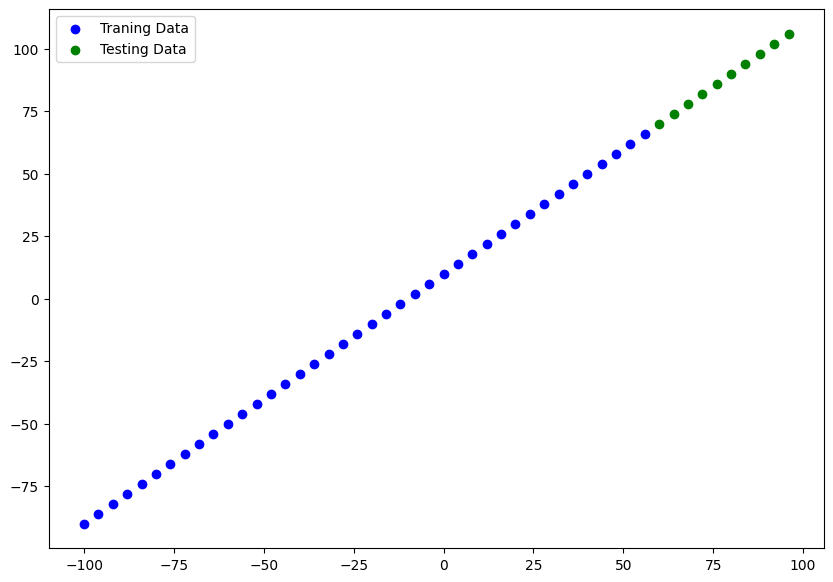

In [ ]:
plt.figure(figsize=(10,7))
# Plot tranig data in blue
plt.scatter(X_train,y_train,c="b",label="Traning Data")
# Plot test data in green
plt.scatter(X_test,y_test,c="g",label="Testing Data")
# Show a legend
plt.legend();

In [ ]:
# Let's have a look at have to build a neural network for our data

# 1. Create a model
model =tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# # 3. Fit the model
# model.fit(X_train,y_train,epochs=100)

In [ ]:
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.build()

In [ ]:
from os import name
# Let's create a model which builds automatically by  defining the input_shape argument
# tf.random.set_seed(42)

# Create a mmodel (same as above)
model =tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1],activation=None,name="input_Layer"),
    tf.keras.layers.Dense(1,input_shape=[1],name="Output_layer")
],name="model_1")


# 2.Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=["mae"])

# # 3. Fit the model
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 28.0441 - mae: 28.0441
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.8981 - mae: 9.8981
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 13.5369 - mae: 13.5369
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 14.6056 - mae: 14.6056
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10.9391 - mae: 10.9391
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.2848 - mae: 7.2848 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.0000 - mae: 10.0000 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.2528 - mae: 8.2528 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.0241 - mae: 7.0241
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.5133 - mae: 7.5133 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.3201 - mae: 6.3201 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.2098 - mae: 7.2098
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_Layer (Dense)                  │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_layer (Dense)                 │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 905 (3.54 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 604 (2.36 KB)

* Total params - total number of parameters in the model
* Trainable parameters - these are the parametrs (pattetn) the model can update as it trains.
* Non-traniable pram - these parametrs aren't updated during traning (this is typical hen you bring parametrs from other models during **transfer learning**)

In [ ]:
# Let's fit our model to the traning data
model.fit(X_train,y_train,epochs=100,verbose=0)

In [ ]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_Layer (Dense)                  │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_layer (Dense)                 │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 905 (3.54 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 604 (2.36 KB)

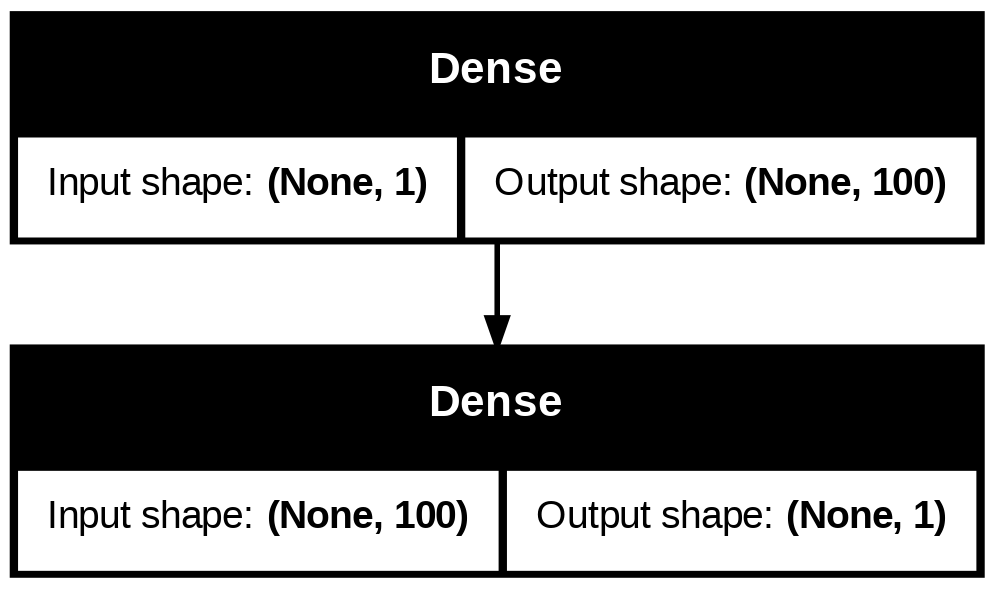

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model , show_shapes=True)

### Visualizing our model's prediction

To visualize prediction ,it's good idea to plot them against the ground truth lables.

Often you'll see this int he form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model prediction).

In [ ]:
# Makes some predection
y_pred= model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[ 70.38841 ],
       [ 74.413704],
       [ 78.438995],
       [ 82.46429 ],
       [ 86.489586],
       [ 90.51487 ],
       [ 94.54015 ],
       [ 98.56545 ],
       [102.590744],
       [106.616035]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Let's create a plotting fuction
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    prediction=y_pred
                    ):
  """
Plots traning data , test data and comprare prediction to ground truth labels
  """
  plt.figure(figsize=(10,7))
  # Plot traning data in blue
  plt.scatter(train_data,train_labels,c="b",label="Traning Data")
  # Plot test data in green
  plt.scatter(test_data,test_labels,c="g",label="Testing Data")
  # Plot traning data in red
  plt.scatter(test_data,prediction,c="r",label="Prediction")
  # Show a legend
  plt.legend();

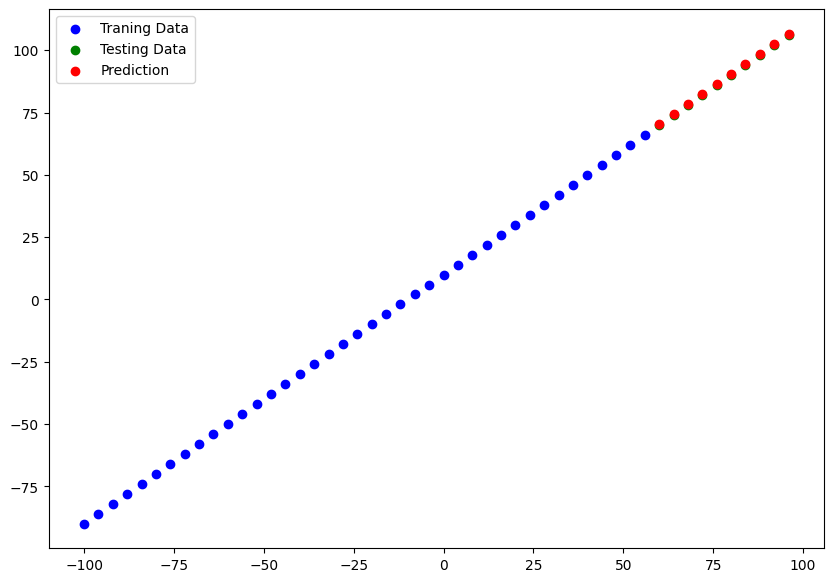

In [ ]:
plot_prediction()

### Evaluating our model's predcition with regression evaluation matrics

Depending on the problem you're working on , there will be different metrics to evaluate your model's performance.

Since we're working on a regression ,two of thee main metrics :
* MAE - mean absolute error ,"on average , how wrong is each of my model's prediction"
* MSE - mean square error , "square the average errors"  

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.5022 - mae: 0.5022


[0.5022239685058594, 0.5022239685058594]

In [ ]:
# Calculate the mean absolute error
mae = tf.keras.losses.MAE(y_true=y_test,y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.38841248, 0.41370392, 0.43899536, 0.4642868 , 0.48958588,
       0.5148697 , 0.5401535 , 0.5654526 , 0.590744  , 0.61603546],
      dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.38841 ],
       [ 74.413704],
       [ 78.438995],
       [ 82.46429 ],
       [ 86.489586],
       [ 90.51487 ],
       [ 94.54015 ],
       [ 98.56545 ],
       [102.590744],
       [106.616035]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.38841 ,  74.413704,  78.438995,  82.46429 ,  86.489586,
        90.51487 ,  94.54015 ,  98.56545 , 102.590744, 106.616035],
      dtype=float32)>

In [ ]:
# Calculate mean absolute error
# Calculate the mean absolute error
mae = tf.keras.losses.MAE(y_true=y_test,y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.50222397>

In [ ]:
# Calaulate the mean square error
# Calculate the mean absolute error
mse = tf.keras.losses.MSE(y_true=y_test,y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.257506>

In [ ]:
# Make some function to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.losses.MAE(y_true, tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.keras.losses.MSE(y_true, tf.squeeze(y_pred))

### Runnig experiments to improve model

``Build a model -> fit it -> evalute it -> tweak a model -> fit it -> evaluate it -> tweak a mdoel -> fit it ->evaluate it ...``

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationshipls between features and labels).
2. Make your model larger (using a more complex model) - this might come in hand in the formofmore layers or more hidden layers or more hidden units in each layers .
3. Train for longer - give your model more of a chance to find patters in the data.

Let's do 3 modelling experiments :
 1. `Model_1` - same as the original model , 1 layer , trained 100 epochs
 2. `Model_2` - 2 layers , trained for 100 epochs
 3. `Model_3` - 2 layers , trained for 500 epochs

 **Build model_1**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_1= tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])
# 2. compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
# 3. Fit the model
model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 11.5973 - mae: 11.5973 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.8319 - mae: 7.8319
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.7094 - mae: 10.7094 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.6529 - mae: 7.6529 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 11.8729 - mae: 11.8729 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.0041 - mae: 8.0041 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.6900 - mae: 9.6900 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.9862 - mae: 7.9862 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.6784 - mae: 9.6784 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.9684 - mae: 7.9684
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.6668 - mae: 9.6668
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.9505 - mae: 7.9505 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


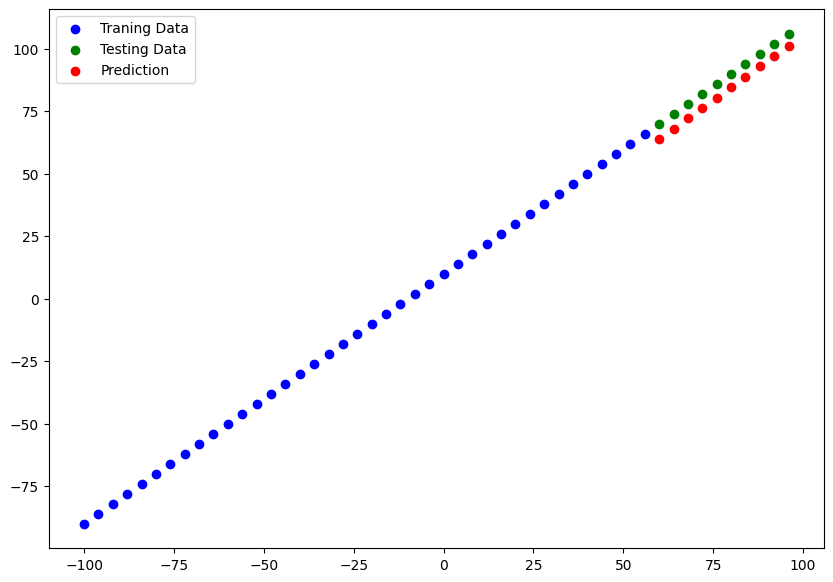

In [ ]:
# Make and plot prediction with model_1
y_pred_1 = model_1.predict(X_test)
plot_prediction(prediction=y_pred_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=5.4791627>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.230173>)

**Build `Model_2`**

* 2 dense layers , train 100 epochs

In [ ]:
# Set a random seed
tf.random.set_seed(42)

# 1. Create a model_2
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1]),
    tf.keras.layers.Dense(1,input_shape=[1])
])

# Compile our model
model_2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mse"])

# Fit the model
model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 48.3425 - mse: 3308.2639 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 30.5430 - mse: 1271.7317
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26.7037 - mse: 975.0082  
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.2871 - mse: 362.4867
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 19.1609 - mse: 493.3333 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.7859 - mse: 260.0220
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 18.1734 - mse: 440.4973
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 13.4404 - mse: 266.9079
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.8346 - mse: 305.8785 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.7613 - mse: 335.0498
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.9062 - mse: 215.6614
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 14.9120 - mse: 305.6878
Epoch 13/100
2/2 ━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


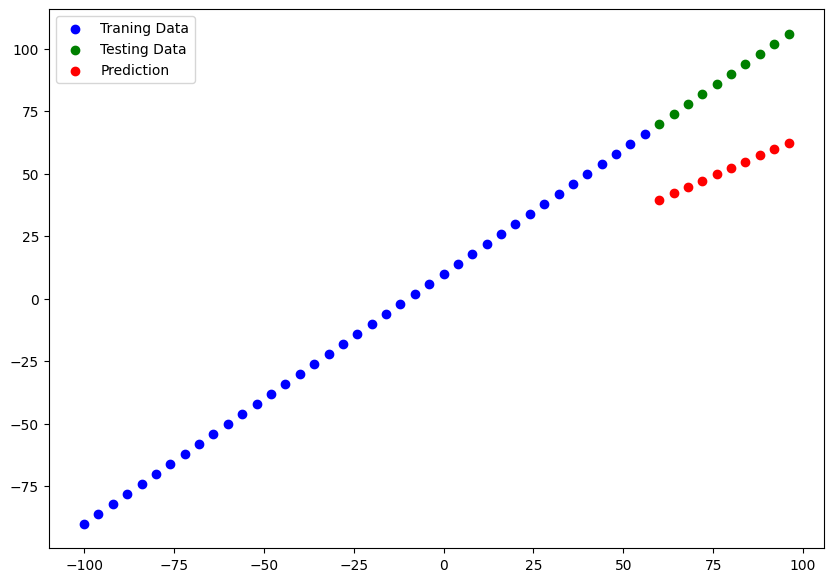

In [ ]:
# Make and plot prediction
y_pred_2 = model_2.predict(X_test)
plot_prediction(prediction=y_pred_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=37.00183>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1386.9083>)

**Build `Model_3`**
* 2 layers , trained for 500 epochs

In [ ]:
# Set a random seed
tf.random.set_seed(42)

# 1. Create a model_3
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1]),
    tf.keras.layers.Dense(1,input_shape=[1])
])

# Compile our model
model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# Fit the model
model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 34.9596 - mae: 34.9596 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 27.4735 - mae: 27.4735 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 24.8360 - mae: 24.8360 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.5591 - mae: 14.5591 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.6088 - mae: 18.6088 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.3896 - mae: 12.3896 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.1831 - mae: 15.1831 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.7996 - mae: 15.7996 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.7137 - mae: 11.7137 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.6596 - mae: 14.6596 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.6595 - mae: 15.6595 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.8662 - mae: 11.8662 
Epoch 13/500
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


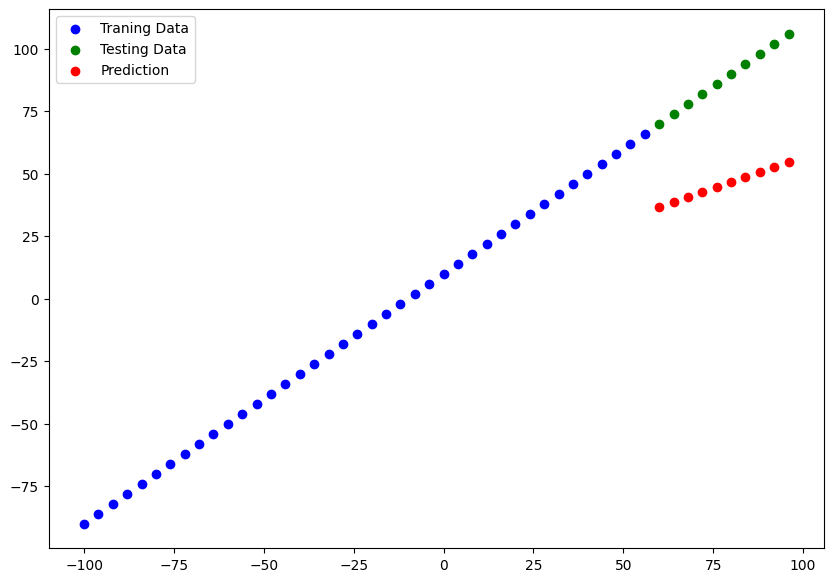

In [ ]:
# Make and plot some prediction
y_pred_3 = model_3.predict(X_test)
plot_prediction(prediction=y_pred_3)

In [ ]:
# Calculate model 3 evaluation metrics
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=42.352844>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1825.8076>)

### Comparing the results of our experiments
We've run a few experiments , let's compare the results.

In [ ]:
# Let's compare our model's results using pandas DataFrame
import pandas as pd

model_results=[["model_1",mae_1.numpy(),mse_1.numpy()],
               ["model_2",mae_2.numpy(),mse_2.numpy()],
               ["model_3",mae_3.numpy(),mse_3.numpy()]]
all_results=pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,5.479163,30.230173
1,model_2,37.001831,1386.908325
2,model_3,42.352844,1825.807617


In [ ]:
model_1.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)